In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_img(image, title="image"):
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

In [3]:
tungsten = "/Users/yuna/Homework/HW3 Image Samples/High-boost Filtering/Fig0327(a)(tungsten_original).jpg"
town = "/Users/yuna/Homework/HW3 Image Samples/High-boost Filtering/Fig0525(a)(aerial_view_no_turb).jpg"

In [4]:
src = cv2.imread(town, 0)

h, w = src.shape

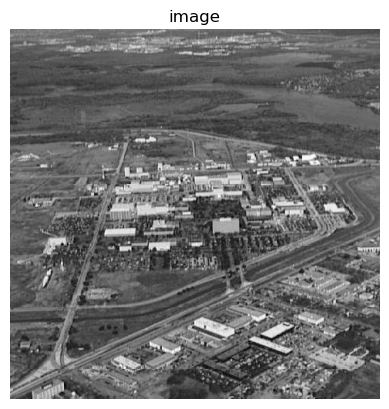

In [5]:
show_img(src)

In [6]:
def highboost_mask(a, n):
    mask4 = [ [0,  -1,  0],
              [-1, a+4, -1],
              [0,  -1,  0] ]
    mask8 = [ [-1, -1, -1],
              [-1, a+8, -1],
              [-1, -1, -1] ]
    if (n==4): return mask4
    if (n==8): return mask8

In [7]:
def highboost_filtering(image, h, w, mask):
    new = np.zeros((h,w), dtype=np.uint8)
    
    for i in range(3, h-3):
        for j in range(3, w-3):
            sum_ = 0
            for x in range(3):
                for y in range(3):
                    sum_ += image[i+x-1][j+y-1] * mask[x][y]
            if (sum_<0): sum_=0
            if (sum_>255): sum_ = 255
            new[i][j] = sum_
            
    return new

In [8]:
mask = highboost_mask(0.1, 8)

new = highboost_filtering(src, h, w, mask)

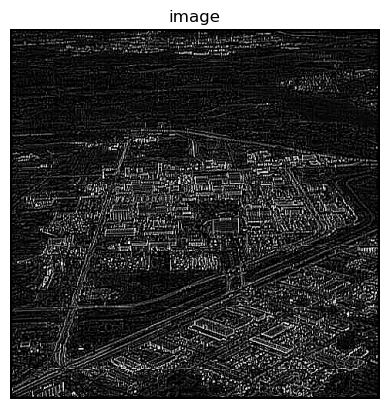

In [9]:
show_img(new)

In [ ]:
cv2.imwrite("/Users/yuna/Homework/HW3 Image Samples/High-boost Filtering/Fig0525(a) town highboost-filtering n8 a=01.jpg", new)